# Bitcoin LSTM Model with Tweet Volume and Sentiment

Data: https://www.kaggle.com/paul92s/bitcoin-lstm-model-with-tweet-volume-and-sentiment/data

Article: https://medium.com/@DrPaulSimpson/lstm-model-predicting-bitcoin-with-tweet-volume-sentiment-bc3c490271a7

In [3]:
import pandas as pd
import re 
from matplotlib import pyplot
import seaborn as sns
import numpy as np
import os # accessing directory structure


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

#set seed
np.random.seed(12345)

# Data Pre-processing

In [1]:
#Must get cleanprep from Kaggle Dataset because is a larger file
notclean = pd.read_csv('./data/cleanprep.csv', delimiter=',', error_bad_lines=False, engine = 'python', header = None)

NameError: name 'pd' is not defined

In [7]:
notclean.head()

,0,1,2,3,4
0,2018-07-11 19:35:15.363270,b'tj',"b""Next two weeks prob v boring (climb up to 9k...",0.007273,0.590909
1,2018-07-11 19:35:15.736769,b'Kool_Kheart',b'@Miss_rinola But you\xe2\x80\x99ve heard abo...,0.000000,0.000000
2,2018-07-11 19:35:15.744769,b'Gary Lang',b'Duplicate skilled traders automatically with...,0.625000,0.500000
3,2018-07-11 19:35:15.867339,b'Jobs in Fintech',b'Project Manager - Technical - FinTech - Cent...,0.000000,0.175000
4,2018-07-11 19:35:16.021448,b'ERC20',"b'Coinbase App Downloads Drop, Crypto Hype Fad...",0.333333,0.500000


In [8]:
#-----------------Pre-processing -------------------#

notclean.columns =['dt', 'name','text','polarity','sensitivity']

In [9]:
notclean =notclean.drop(['name','text'], axis=1)

In [10]:
notclean.head()

,dt,polarity,sensitivity
0,2018-07-11 19:35:15.363270,0.007273,0.590909
1,2018-07-11 19:35:15.736769,0.000000,0.000000
2,2018-07-11 19:35:15.744769,0.625000,0.500000
3,2018-07-11 19:35:15.867339,0.000000,0.175000
4,2018-07-11 19:35:16.021448,0.333333,0.500000


In [11]:
notclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413001 entries, 0 to 1413000
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   dt           1413001 non-null  object 
 1   polarity     1413001 non-null  float64
 2   sensitivity  1413001 non-null  float64
dtypes: float64(2), object(1)
memory usage: 32.3+ MB


In [12]:
notclean['dt'] = pd.to_datetime(notclean['dt'])

In [13]:
notclean['DateTime'] = notclean['dt'].dt.floor('h')
notclean.head()

,dt,polarity,sensitivity,DateTime
0,2018-07-11 19:35:15.363270,0.007273,0.590909,2018-07-11 19:00:00
1,2018-07-11 19:35:15.736769,0.000000,0.000000,2018-07-11 19:00:00
2,2018-07-11 19:35:15.744769,0.625000,0.500000,2018-07-11 19:00:00
3,2018-07-11 19:35:15.867339,0.000000,0.175000,2018-07-11 19:00:00
4,2018-07-11 19:35:16.021448,0.333333,0.500000,2018-07-11 19:00:00


In [14]:
vdf = notclean.groupby(pd.Grouper(key='dt',freq='H')).size().reset_index(name='tweet_vol')

In [15]:
vdf.head()

,dt,tweet_vol
0,2018-07-11 19:00:00,1747
1,2018-07-11 20:00:00,4354
2,2018-07-11 21:00:00,4432
3,2018-07-11 22:00:00,3980
4,2018-07-11 23:00:00,3830


In [16]:
vdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   dt         302 non-null    datetime64[ns]
 1   tweet_vol  302 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.8 KB


In [17]:
vdf.index = pd.to_datetime(vdf.index)
vdf=vdf.set_index('dt')

In [18]:
vdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 302 entries, 2018-07-11 19:00:00 to 2018-07-24 08:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_vol  302 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


In [19]:
vdf.head()

,tweet_vol
dt,
2018-07-11 19:00:00,1747
2018-07-11 20:00:00,4354
2018-07-11 21:00:00,4432
2018-07-11 22:00:00,3980
2018-07-11 23:00:00,3830


In [20]:
notclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413001 entries, 0 to 1413000
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   dt           1413001 non-null  datetime64[ns]
 1   polarity     1413001 non-null  float64       
 2   sensitivity  1413001 non-null  float64       
 3   DateTime     1413001 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2)
memory usage: 43.1 MB


In [21]:
notclean.index = pd.to_datetime(notclean.index)

In [22]:
notclean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1413001 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.001413
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   dt           1413001 non-null  datetime64[ns]
 1   polarity     1413001 non-null  float64       
 2   sensitivity  1413001 non-null  float64       
 3   DateTime     1413001 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2)
memory usage: 53.9 MB


In [23]:
vdf['tweet_vol'] =vdf['tweet_vol'].astype(float)

In [24]:
vdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 302 entries, 2018-07-11 19:00:00 to 2018-07-24 08:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_vol  302 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


In [25]:
notclean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1413001 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.001413
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   dt           1413001 non-null  datetime64[ns]
 1   polarity     1413001 non-null  float64       
 2   sensitivity  1413001 non-null  float64       
 3   DateTime     1413001 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2)
memory usage: 53.9 MB


In [26]:
notclean.head()

,dt,polarity,sensitivity,DateTime
1970-01-01 00:00:00.000000000,2018-07-11 19:35:15.363270,0.007273,0.590909,2018-07-11 19:00:00
1970-01-01 00:00:00.000000001,2018-07-11 19:35:15.736769,0.000000,0.000000,2018-07-11 19:00:00
1970-01-01 00:00:00.000000002,2018-07-11 19:35:15.744769,0.625000,0.500000,2018-07-11 19:00:00
1970-01-01 00:00:00.000000003,2018-07-11 19:35:15.867339,0.000000,0.175000,2018-07-11 19:00:00
1970-01-01 00:00:00.000000004,2018-07-11 19:35:16.021448,0.333333,0.500000,2018-07-11 19:00:00


In [27]:
#ndf = pd.merge(notclean,vdf, how='inner',left_index=True, right_index=True)

In [28]:
notclean.head()

,dt,polarity,sensitivity,DateTime
1970-01-01 00:00:00.000000000,2018-07-11 19:35:15.363270,0.007273,0.590909,2018-07-11 19:00:00
1970-01-01 00:00:00.000000001,2018-07-11 19:35:15.736769,0.000000,0.000000,2018-07-11 19:00:00
1970-01-01 00:00:00.000000002,2018-07-11 19:35:15.744769,0.625000,0.500000,2018-07-11 19:00:00
1970-01-01 00:00:00.000000003,2018-07-11 19:35:15.867339,0.000000,0.175000,2018-07-11 19:00:00
1970-01-01 00:00:00.000000004,2018-07-11 19:35:16.021448,0.333333,0.500000,2018-07-11 19:00:00


In [29]:
df = notclean.groupby('DateTime').agg(lambda x: x.mean())

In [30]:
df['Tweet_vol'] = vdf['tweet_vol']

In [31]:
df = df.drop(df.index[0])

In [32]:
df.head()

,dt,polarity,sensitivity,Tweet_vol
DateTime,,,,
2018-07-11 20:00:00,2018-07-11 20:27:49.510636288,0.102657,0.216148,4354.0
2018-07-11 21:00:00,2018-07-11 21:28:35.636368640,0.098004,0.218612,4432.0
2018-07-11 22:00:00,2018-07-11 22:27:44.646705152,0.096688,0.231342,3980.0
2018-07-11 23:00:00,2018-07-11 23:28:06.455850496,0.103997,0.217739,3830.0
2018-07-12 00:00:00,2018-07-12 00:28:47.975385344,0.094383,0.195256,3998.0


In [33]:
df.tail()

,dt,polarity,sensitivity,Tweet_vol
DateTime,,,,
2018-07-24 04:00:00,2018-07-24 04:27:40.946246656,0.121358,0.236000,4475.0
2018-07-24 05:00:00,2018-07-24 05:28:40.424965632,0.095163,0.216924,4808.0
2018-07-24 06:00:00,2018-07-24 06:30:52.606722816,0.088992,0.220173,6036.0
2018-07-24 07:00:00,2018-07-24 07:27:29.229673984,0.091439,0.198279,6047.0
2018-07-24 08:00:00,2018-07-24 08:07:02.674452224,0.071268,0.218217,2444.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 301 entries, 2018-07-11 20:00:00 to 2018-07-24 08:00:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dt           301 non-null    datetime64[ns]
 1   polarity     301 non-null    float64       
 2   sensitivity  301 non-null    float64       
 3   Tweet_vol    301 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.8 KB


In [35]:
btcDF = pd.read_csv('./data/btcSave2.csv', error_bad_lines=False, engine = 'python')

In [36]:
btcDF['Timestamp'] = pd.to_datetime(btcDF['Timestamp'])
btcDF = btcDF.set_index(pd.DatetimeIndex(btcDF['Timestamp']))

In [37]:
btcDF.head()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Timestamp,,,,,,,,
2018-07-10 01:00:00,2018-07-10 01:00:00,6666.75,6683.90,6635.59,6669.73,281.73,1875693.72,6657.70
2018-07-10 02:00:00,2018-07-10 02:00:00,6662.44,6674.60,6647.00,6647.00,174.10,1160103.29,6663.38
2018-07-10 03:00:00,2018-07-10 03:00:00,6652.52,6662.82,6621.99,6632.53,231.41,1536936.22,6641.70
2018-07-10 04:00:00,2018-07-10 04:00:00,6631.17,6655.48,6625.54,6635.92,120.38,799154.77,6638.52
2018-07-10 05:00:00,2018-07-10 05:00:00,6632.81,6651.06,6627.64,6640.57,94.00,624289.31,6641.32


In [38]:
btcDF = btcDF.drop(['Timestamp'], axis=1)

In [39]:
btcDF.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Timestamp,,,,,,,
2018-07-10 01:00:00,6666.75,6683.90,6635.59,6669.73,281.73,1875693.72,6657.70
2018-07-10 02:00:00,6662.44,6674.60,6647.00,6647.00,174.10,1160103.29,6663.38
2018-07-10 03:00:00,6652.52,6662.82,6621.99,6632.53,231.41,1536936.22,6641.70
2018-07-10 04:00:00,6631.17,6655.48,6625.54,6635.92,120.38,799154.77,6638.52
2018-07-10 05:00:00,6632.81,6651.06,6627.64,6640.57,94.00,624289.31,6641.32


In [40]:
Final_df = pd.merge(df, btcDF, how='inner', left_index=True, right_index=True)

In [41]:
Final_df.head()

,dt,polarity,sensitivity,Tweet_vol,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
2018-07-11 20:00:00,2018-07-11 20:27:49.510636288,0.102657,0.216148,4354.0,6342.97,6354.19,6291.00,6350.00,986.73,6231532.37,6315.33
2018-07-11 21:00:00,2018-07-11 21:28:35.636368640,0.098004,0.218612,4432.0,6352.99,6370.00,6345.76,6356.48,126.46,804221.55,6359.53
2018-07-11 22:00:00,2018-07-11 22:27:44.646705152,0.096688,0.231342,3980.0,6350.85,6378.47,6345.00,6361.93,259.10,1646353.87,6354.12
2018-07-11 23:00:00,2018-07-11 23:28:06.455850496,0.103997,0.217739,3830.0,6362.36,6381.25,6356.74,6368.78,81.54,519278.69,6368.23
2018-07-12 00:00:00,2018-07-12 00:28:47.975385344,0.094383,0.195256,3998.0,6369.49,6381.25,6361.83,6380.00,124.55,793560.22,6371.51


In [42]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294 entries, 2018-07-11 20:00:00 to 2018-07-24 01:00:00
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dt                 294 non-null    datetime64[ns]
 1   polarity           294 non-null    float64       
 2   sensitivity        294 non-null    float64       
 3   Tweet_vol          294 non-null    float64       
 4   Open               294 non-null    float64       
 5   High               294 non-null    float64       
 6   Low                294 non-null    float64       
 7   Close              294 non-null    float64       
 8   Volume (BTC)       294 non-null    float64       
 9   Volume (Currency)  294 non-null    float64       
 10  Weighted Price     294 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 27.6 KB


In [47]:
Final_df=Final_df.drop(['Weighted Price'],axis=1 )

KeyError: "['Weighted Price'] not found in axis"

In [48]:
Final_df=Final_df.drop(['dt'],axis=1 )

In [49]:
Final_df.head()

,polarity,sensitivity,Tweet_vol,Open,High,Low,Close,Volume (BTC),Volume (Currency)
2018-07-11 20:00:00,0.102657,0.216148,4354.0,6342.97,6354.19,6291.00,6350.00,986.73,6231532.37
2018-07-11 21:00:00,0.098004,0.218612,4432.0,6352.99,6370.00,6345.76,6356.48,126.46,804221.55
2018-07-11 22:00:00,0.096688,0.231342,3980.0,6350.85,6378.47,6345.00,6361.93,259.10,1646353.87
2018-07-11 23:00:00,0.103997,0.217739,3830.0,6362.36,6381.25,6356.74,6368.78,81.54,519278.69
2018-07-12 00:00:00,0.094383,0.195256,3998.0,6369.49,6381.25,6361.83,6380.00,124.55,793560.22


In [50]:
Final_df.columns = ['Polarity', 'Sensitivity','Tweet_vol','Open','High','Low', 'Close_Price', 'Volume_BTC', 'Volume_Dollar']

In [51]:
Final_df.head()

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Close_Price,Volume_BTC,Volume_Dollar
2018-07-11 20:00:00,0.102657,0.216148,4354.0,6342.97,6354.19,6291.00,6350.00,986.73,6231532.37
2018-07-11 21:00:00,0.098004,0.218612,4432.0,6352.99,6370.00,6345.76,6356.48,126.46,804221.55
2018-07-11 22:00:00,0.096688,0.231342,3980.0,6350.85,6378.47,6345.00,6361.93,259.10,1646353.87
2018-07-11 23:00:00,0.103997,0.217739,3830.0,6362.36,6381.25,6356.74,6368.78,81.54,519278.69
2018-07-12 00:00:00,0.094383,0.195256,3998.0,6369.49,6381.25,6361.83,6380.00,124.55,793560.22


In [52]:
Final_df = Final_df[['Polarity', 'Sensitivity','Tweet_vol', 'Open','High','Low', 'Volume_BTC', 'Volume_Dollar', 'Close_Price']]

In [53]:
Final_df

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
2018-07-11 20:00:00,0.102657,0.216148,4354.0,6342.97,6354.19,6291.00,986.73,6231532.37,6350.00
2018-07-11 21:00:00,0.098004,0.218612,4432.0,6352.99,6370.00,6345.76,126.46,804221.55,6356.48
2018-07-11 22:00:00,0.096688,0.231342,3980.0,6350.85,6378.47,6345.00,259.10,1646353.87,6361.93
2018-07-11 23:00:00,0.103997,0.217739,3830.0,6362.36,6381.25,6356.74,81.54,519278.69,6368.78
2018-07-12 00:00:00,0.094383,0.195256,3998.0,6369.49,6381.25,6361.83,124.55,793560.22,6380.00
...,...,...,...,...,...,...,...,...,...
2018-07-23 21:00:00,0.107282,0.235636,5164.0,7746.99,7763.59,7690.16,237.63,1836633.86,7706.00
2018-07-23 22:00:00,0.094493,0.271796,4646.0,7699.13,7759.99,7690.50,63.31,489000.25,7750.09
2018-07-23 23:00:00,0.074246,0.231640,4455.0,7754.57,7777.00,7715.45,280.46,2173424.81,7722.32
2018-07-24 00:00:00,0.080870,0.219367,3862.0,7722.95,7730.61,7690.17,496.48,3830571.66,7719.62


In [54]:
#---------------Stage 1 Complete ------------------#
#Final_df.to_csv('Desktop/Sentiment.csv')

# Exploratory Analysis

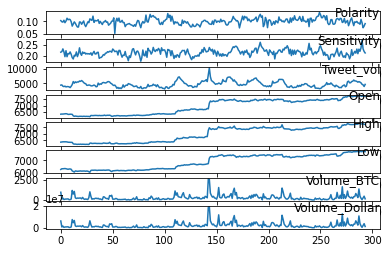

In [55]:
#--------------Analysis----------------------------#

values = Final_df.values
groups = [0,1,2,3,4,5,6,7]
i = 1  
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1,i)
    pyplot.plot(values[:,group])
    pyplot.title(Final_df.columns[group], y=.5, loc='right')
    i += 1
pyplot.show()

In [56]:
Final_df['Volume_BTC'].max()

2640.49

In [57]:
Final_df['Volume_Dollar'].max()

19126407.89

In [58]:
Final_df['Volume_BTC'].sum()

96945.04000000001

In [59]:
Final_df['Volume_Dollar'].sum()

684457140.05

In [60]:
Final_df['Tweet_vol'].max()

10452.0

In [61]:
Final_df.describe()

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,2.940000e+02,294.000000
mean,0.099534,0.214141,4691.119048,6915.349388,6946.782925,6889.661054,329.745034,2.328086e+06,6920.150000
std,0.012114,0.014940,1048.922706,564.467674,573.078843,559.037540,344.527625,2.508128e+06,565.424866
min,0.051695,0.174330,2998.000000,6149.110000,6173.610000,6072.000000,22.000000,1.379601e+05,6149.110000
25%,0.091489,0.203450,3878.750000,6285.077500,6334.942500,6266.522500,129.230000,8.412214e+05,6283.497500
50%,0.099198,0.214756,4452.000000,7276.845000,7311.380000,7245.580000,223.870000,1.607008e+06,7281.975000
75%,0.106649,0.223910,5429.750000,7422.957500,7457.202500,7396.427500,385.135000,2.662185e+06,7424.560000
max,0.135088,0.271796,10452.000000,7754.570000,7800.000000,7724.500000,2640.490000,1.912641e+07,7750.090000


In [62]:
cor = Final_df.corr()
cor

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
Polarity,1.000000,0.380350,-0.167573,0.179056,0.176277,0.180088,-0.062868,-0.052646,0.178456
Sensitivity,0.380350,1.000000,0.053903,0.194763,0.200611,0.190222,0.097124,0.112425,0.193203
Tweet_vol,-0.167573,0.053903,1.000000,0.237185,0.262207,0.234330,0.541112,0.545850,0.250448
Open,0.179056,0.194763,0.237185,1.000000,0.997128,0.998799,0.217478,0.277600,0.997217
High,0.176277,0.200611,0.262207,0.997128,1.000000,0.996650,0.270551,0.329816,0.998816
Low,0.180088,0.190222,0.234330,0.998799,0.996650,1.000000,0.202895,0.263863,0.998058
Volume_BTC,-0.062868,0.097124,0.541112,0.217478,0.270551,0.202895,1.000000,0.995873,0.243875
Volume_Dollar,-0.052646,0.112425,0.545850,0.277600,0.329816,0.263863,0.995873,1.000000,0.303347
Close_Price,0.178456,0.193203,0.250448,0.997217,0.998816,0.998058,0.243875,0.303347,1.000000


In [63]:
Top_Vol = Final_df['Volume_BTC'].nlargest(10)
Top_Vol

2018-07-17 18:00:00    2640.49
2018-07-17 19:00:00    2600.32
2018-07-23 03:00:00    1669.28
2018-07-18 04:00:00    1576.15
2018-07-20 17:00:00    1510.00
2018-07-18 19:00:00    1490.02
2018-07-23 19:00:00    1396.32
2018-07-12 07:00:00    1211.64
2018-07-16 10:00:00    1147.69
2018-07-23 08:00:00    1135.38
Name: Volume_BTC, dtype: float64

In [64]:
Top_Sen = Final_df['Sensitivity'].nlargest(10)
Top_Sen

2018-07-23 22:00:00    0.271796
2018-07-19 20:00:00    0.262048
2018-07-21 19:00:00    0.256952
2018-07-20 22:00:00    0.246046
2018-07-22 06:00:00    0.245820
2018-07-19 19:00:00    0.244655
2018-07-19 21:00:00    0.244215
2018-07-18 20:00:00    0.243534
2018-07-18 21:00:00    0.243422
2018-07-18 18:00:00    0.241287
Name: Sensitivity, dtype: float64

In [65]:
Top_Pol = Final_df['Polarity'].nlargest(10)
Top_Pol

2018-07-22 05:00:00    0.135088
2018-07-16 03:00:00    0.130634
2018-07-19 20:00:00    0.127696
2018-07-15 10:00:00    0.127469
2018-07-22 06:00:00    0.126299
2018-07-15 06:00:00    0.124505
2018-07-16 05:00:00    0.124210
2018-07-22 09:00:00    0.122784
2018-07-15 13:00:00    0.122411
2018-07-22 12:00:00    0.122021
Name: Polarity, dtype: float64

In [66]:
Top_Tweet = Final_df['Tweet_vol'].nlargest(10)
Top_Tweet

2018-07-17 19:00:00    10452.0
2018-07-17 18:00:00     7995.0
2018-07-17 20:00:00     7354.0
2018-07-16 14:00:00     7280.0
2018-07-18 15:00:00     7222.0
2018-07-18 14:00:00     7209.0
2018-07-18 13:00:00     7171.0
2018-07-16 13:00:00     7133.0
2018-07-19 16:00:00     6886.0
2018-07-18 12:00:00     6844.0
Name: Tweet_vol, dtype: float64

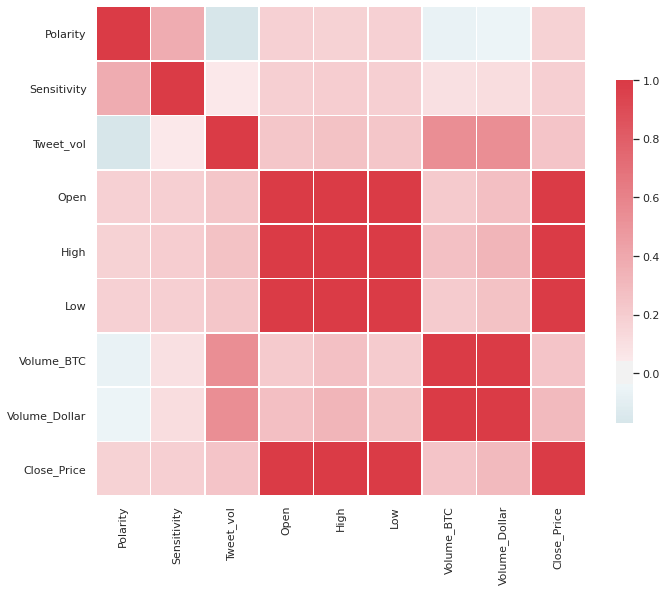

In [67]:
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

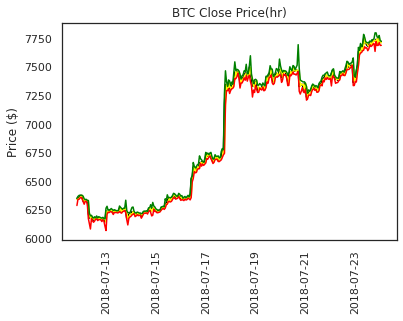

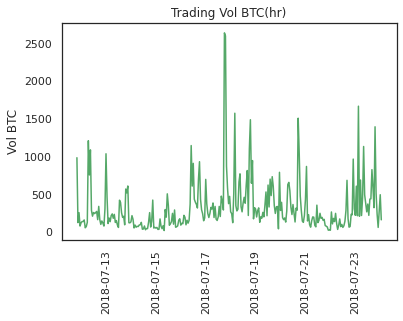

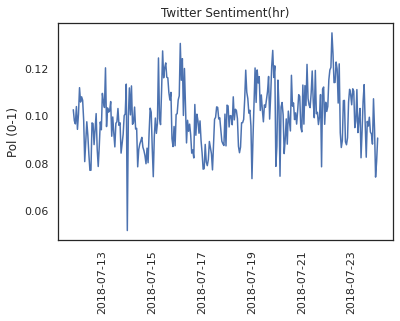

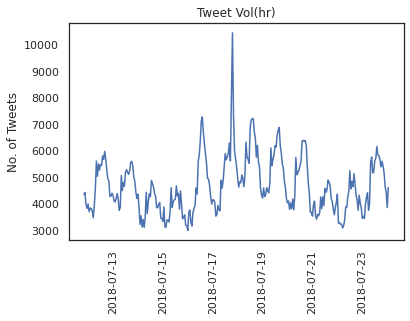

In [72]:
plt.plot(Final_df.index, Final_df['Close_Price'], 'black')
plt.plot(Final_df.index, Final_df['Open'], 'yellow')
plt.plot(Final_df.index, Final_df['Low'], 'red')
plt.plot(Final_df.index, Final_df['High'], 'green')
plt.title('BTC Close Price(hr)')
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)');
plt.show();

plt.plot(Final_df.index, Final_df['Volume_BTC'], 'g')
plt.title('Trading Vol BTC(hr)')
plt.xticks(rotation='vertical')
plt.ylabel('Vol BTC');
plt.show();

plt.plot(Final_df.index, Final_df['Polarity'], 'b')
plt.xticks(rotation='vertical')
plt.title('Twitter Sentiment(hr)')
plt.ylabel('Pol (0-1)');
plt.show();

plt.plot(Final_df.index, Final_df['Tweet_vol'], 'b')
plt.xticks(rotation='vertical')
plt.title('Tweet Vol(hr)')
plt.ylabel('No. of Tweets');
plt.show();

In [70]:
#sns Heatmap for Hour x volume 
#Final_df['time']=Final_df.index.time()
Final_df['time']=Final_df.index.to_series().apply(lambda x: x.strftime("%X"))

In [71]:
Final_df.head()

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price,time
2018-07-11 20:00:00,0.102657,0.216148,4354.0,6342.97,6354.19,6291.00,986.73,6231532.37,6350.00,20:00:00
2018-07-11 21:00:00,0.098004,0.218612,4432.0,6352.99,6370.00,6345.76,126.46,804221.55,6356.48,21:00:00
2018-07-11 22:00:00,0.096688,0.231342,3980.0,6350.85,6378.47,6345.00,259.10,1646353.87,6361.93,22:00:00
2018-07-11 23:00:00,0.103997,0.217739,3830.0,6362.36,6381.25,6356.74,81.54,519278.69,6368.78,23:00:00
2018-07-12 00:00:00,0.094383,0.195256,3998.0,6369.49,6381.25,6361.83,124.55,793560.22,6380.00,00:00:00


In [73]:
hour_df=Final_df

In [74]:
hour_df=hour_df.groupby('time').agg(lambda x: x.mean())

In [75]:
hour_df

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
time,,,,,,,,,
00:00:00,0.090298,0.211771,3976.384615,6930.237692,6958.360769,6900.588462,322.836154,2.228120e+06,6935.983077
01:00:00,0.099596,0.211714,4016.615385,6935.140769,6963.533846,6894.772308,318.415385,2.243338e+06,6933.794615
02:00:00,0.102724,0.204445,3824.083333,6868.211667,6889.440000,6842.588333,158.836667,1.105651e+06,6870.695833
03:00:00,0.105586,0.214824,3791.666667,6870.573333,6909.675833,6855.316667,328.811667,2.385733e+06,6888.139167
04:00:00,0.103095,0.208516,3822.916667,6887.420000,6911.649167,6872.603333,271.692500,1.949230e+06,6890.985000
05:00:00,0.108032,0.215058,3904.166667,6891.468333,6911.175833,6869.017500,213.315000,1.524601e+06,6890.451667
06:00:00,0.104412,0.210424,3760.250000,6889.327500,6907.070833,6868.484167,183.329167,1.281427e+06,6891.371667
07:00:00,0.100942,0.209435,4056.000000,6891.645833,6908.654167,6858.290833,329.882500,2.263694e+06,6878.757500
08:00:00,0.099380,0.210113,5095.583333,6878.635833,6903.660833,6851.435833,368.109167,2.616314e+06,6885.867500


In [76]:
hour_df.head()

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
time,,,,,,,,,
00:00:00,0.090298,0.211771,3976.384615,6930.237692,6958.360769,6900.588462,322.836154,2.228120e+06,6935.983077
01:00:00,0.099596,0.211714,4016.615385,6935.140769,6963.533846,6894.772308,318.415385,2.243338e+06,6933.794615
02:00:00,0.102724,0.204445,3824.083333,6868.211667,6889.440000,6842.588333,158.836667,1.105651e+06,6870.695833
03:00:00,0.105586,0.214824,3791.666667,6870.573333,6909.675833,6855.316667,328.811667,2.385733e+06,6888.139167
04:00:00,0.103095,0.208516,3822.916667,6887.420000,6911.649167,6872.603333,271.692500,1.949230e+06,6890.985000


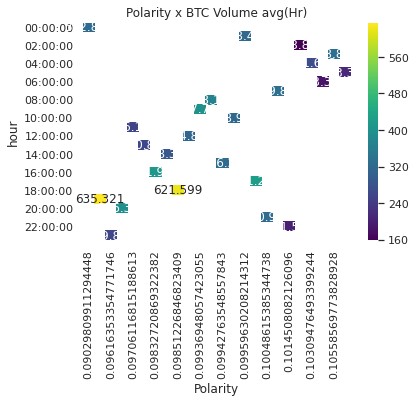

In [77]:
#sns Hourly Heatmap
hour_df['hour'] = hour_df.index
result = hour_df.pivot(index='hour', columns='Polarity', values='Volume_BTC')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title('Polarity x BTC Volume avg(Hr)')
plt.show()

#sns daily heatmap?

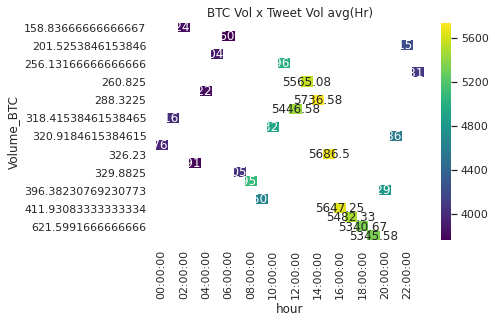

In [78]:
hour_df['hour'] = hour_df.index
result = hour_df.pivot(index='Volume_BTC', columns='hour', values='Tweet_vol')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title('BTC Vol x Tweet Vol avg(Hr)')
plt.show()

In [79]:
cor = Final_df.corr()
cor

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
Polarity,1.000000,0.380350,-0.167573,0.179056,0.176277,0.180088,-0.062868,-0.052646,0.178456
Sensitivity,0.380350,1.000000,0.053903,0.194763,0.200611,0.190222,0.097124,0.112425,0.193203
Tweet_vol,-0.167573,0.053903,1.000000,0.237185,0.262207,0.234330,0.541112,0.545850,0.250448
Open,0.179056,0.194763,0.237185,1.000000,0.997128,0.998799,0.217478,0.277600,0.997217
High,0.176277,0.200611,0.262207,0.997128,1.000000,0.996650,0.270551,0.329816,0.998816
Low,0.180088,0.190222,0.234330,0.998799,0.996650,1.000000,0.202895,0.263863,0.998058
Volume_BTC,-0.062868,0.097124,0.541112,0.217478,0.270551,0.202895,1.000000,0.995873,0.243875
Volume_Dollar,-0.052646,0.112425,0.545850,0.277600,0.329816,0.263863,0.995873,1.000000,0.303347
Close_Price,0.178456,0.193203,0.250448,0.997217,0.998816,0.998058,0.243875,0.303347,1.000000


In [80]:
#----------------End Analysis------------------------#

In [81]:
#---------------- LSTM Prep ------------------------#

In [82]:
df = Final_df

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294 entries, 2018-07-11 20:00:00 to 2018-07-24 01:00:00
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       294 non-null    float64
 1   Sensitivity    294 non-null    float64
 2   Tweet_vol      294 non-null    float64
 3   Open           294 non-null    float64
 4   High           294 non-null    float64
 5   Low            294 non-null    float64
 6   Volume_BTC     294 non-null    float64
 7   Volume_Dollar  294 non-null    float64
 8   Close_Price    294 non-null    float64
 9   time           294 non-null    object 
dtypes: float64(9), object(1)
memory usage: 35.3+ KB


In [84]:
df = df.drop(['Open','High', 'Low', 'Volume_Dollar'], axis=1)
df.head()

,Polarity,Sensitivity,Tweet_vol,Volume_BTC,Close_Price,time
2018-07-11 20:00:00,0.102657,0.216148,4354.0,986.73,6350.00,20:00:00
2018-07-11 21:00:00,0.098004,0.218612,4432.0,126.46,6356.48,21:00:00
2018-07-11 22:00:00,0.096688,0.231342,3980.0,259.10,6361.93,22:00:00
2018-07-11 23:00:00,0.103997,0.217739,3830.0,81.54,6368.78,23:00:00
2018-07-12 00:00:00,0.094383,0.195256,3998.0,124.55,6380.00,00:00:00


In [85]:
df = df[['Close_Price', 'Polarity', 'Sensitivity','Tweet_vol','Volume_BTC']]
df.head()

,Close_Price,Polarity,Sensitivity,Tweet_vol,Volume_BTC
2018-07-11 20:00:00,6350.00,0.102657,0.216148,4354.0,986.73
2018-07-11 21:00:00,6356.48,0.098004,0.218612,4432.0,126.46
2018-07-11 22:00:00,6361.93,0.096688,0.231342,3980.0,259.10
2018-07-11 23:00:00,6368.78,0.103997,0.217739,3830.0,81.54
2018-07-12 00:00:00,6380.00,0.094383,0.195256,3998.0,124.55


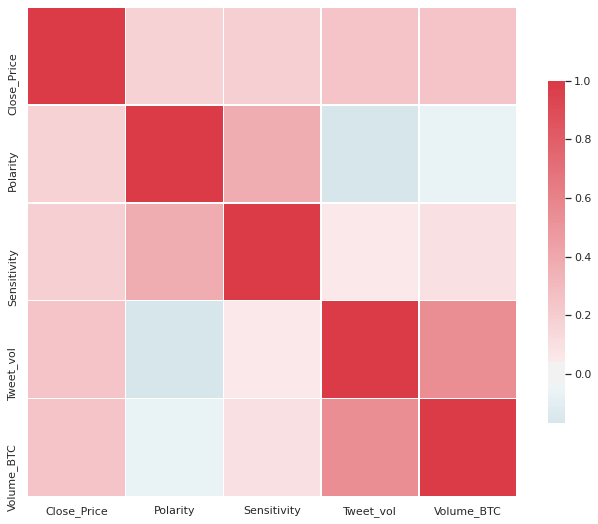

In [86]:
cor = df.corr()
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax =sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

# LSTM Model

In [98]:
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [88]:
values = df.values
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df = df[['Close_Price', 'Polarity', 'Sensitivity','Tweet_vol','Volume_BTC']]
df.head()

,Close_Price,Polarity,Sensitivity,Tweet_vol,Volume_BTC
2018-07-11 20:00:00,6350.00,0.102657,0.216148,4354.0,986.73
2018-07-11 21:00:00,6356.48,0.098004,0.218612,4432.0,126.46
2018-07-11 22:00:00,6361.93,0.096688,0.231342,3980.0,259.10
2018-07-11 23:00:00,6368.78,0.103997,0.217739,3830.0,81.54
2018-07-12 00:00:00,6380.00,0.094383,0.195256,3998.0,124.55


In [89]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.values)

In [90]:
n_hours = 3 #adding 3 hours lags creating number of observations 
n_features = 5 #Features in the dataset.
n_obs = n_hours*n_features

In [91]:
reframed = series_to_supervised(scaled, n_hours, 1)
reframed.head()

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
3,0.125479,0.611105,0.429055,0.181916,0.368430,0.129527,0.555312,0.454335,0.192380,0.039893,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738
4,0.129527,0.555312,0.454335,0.192380,0.039893,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164
5,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637
6,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637,0.111700,0.722717,0.212514,0.113362,0.045561
7,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637,0.111700,0.722717,0.212514,0.113362,0.045561,0.111101,0.649855,0.365349,0.111752,0.053607


In [92]:
reframed.drop(reframed.columns[-4], axis=1)
reframed.head()

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
3,0.125479,0.611105,0.429055,0.181916,0.368430,0.129527,0.555312,0.454335,0.192380,0.039893,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738
4,0.129527,0.555312,0.454335,0.192380,0.039893,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164
5,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637
6,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637,0.111700,0.722717,0.212514,0.113362,0.045561
7,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637,0.111700,0.722717,0.212514,0.113362,0.045561,0.111101,0.649855,0.365349,0.111752,0.053607


In [93]:
print(reframed.head())

   var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var1(t-2)  \
3   0.125479   0.611105   0.429055   0.181916   0.368430   0.129527   
4   0.129527   0.555312   0.454335   0.192380   0.039893   0.132931   
5   0.132931   0.539534   0.584943   0.131741   0.090548   0.137210   
6   0.137210   0.627175   0.445375   0.111618   0.022738   0.144218   
7   0.144218   0.511893   0.214693   0.134156   0.039164   0.135117   

   var2(t-2)  var3(t-2)  var4(t-2)  var5(t-2)  var1(t-1)  var2(t-1)  \
3   0.555312   0.454335   0.192380   0.039893   0.132931   0.539534   
4   0.539534   0.584943   0.131741   0.090548   0.137210   0.627175   
5   0.627175   0.445375   0.111618   0.022738   0.144218   0.511893   
6   0.511893   0.214693   0.134156   0.039164   0.135117   0.589271   
7   0.589271   0.500135   0.095922   0.045637   0.111700   0.722717   

   var3(t-1)  var4(t-1)  var5(t-1)   var1(t)   var2(t)   var3(t)   var4(t)  \
3   0.584943   0.131741   0.090548  0.137210  0.627175  0.445375  0.

In [94]:
values = reframed.values
n_train_hours = 200
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
train.shape

(200, 20)

In [95]:
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

In [96]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(200, 3, 5) (200,) (91, 3, 5) (91,)


In [97]:
# design network
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=6, validation_data=(test_X, test_y), verbose=2, shuffle=False,validation_split=0.2)
# plot history

AttributeError: module 'tensorflow.python.framework.ops' has no attribute '_TensorLike'

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours* n_features,))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mse = (mean_squared_error(inv_y, inv_yhat))
print('Test MSE: %.3f' % mse)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


In [ ]:
plt.plot(inv_y, label='Real')
plt.plot(inv_yhat, label='Predicted')

In [ ]:
plt.title('Real v Predicted Close_Price')
plt.ylabel('Price ($)')
plt.xlabel('epochs (Hr)')
plt.show()